# **3 - Radiation lesson**

Radiation components:
- Skyview factor
- Shortwave radiation
- Clearness index
- Longwave radiation
- Net radiation

## **Longwave radiation**
Complete documentation: https://osf.io/a4pfk/

This component deals with the downwelling ($L_{\downarrow}$) and upwelling ($L_{\uparrow}$) longwave atmospheric radiation. Longwave radiation (1-100 μm) is an important component of the radiation balance on Earth which affects many phenomena such as evapotranspiration, snow melt, glaciers evolution , vegetation dynamics, plant respiration, and primary productivity. 
Many simplified models (SM) have been proposed in order to model $L_{\downarrow}$ and $L_{\uparrow}$ by using easily available meteorological observation such as air temperature, relative humidity, incoming solar radiation, and cloud cover. Ten SM for estimating $L_{\uparrow}$ and one for $L_{\downarrow}$ were integrated in the LWRB component.

### **Component Description**
SMs formulation for $L_{\uparrow}$ [Wm −2 ] and $L_{\downarrow}$ [Wm −2 ] are based on the Stefan-Boltzmann equation:
\begin{equation}
L_{\downarrow} = \epsilon_{all-sky} · \sigma · T_{a}^{4} \\
L_{\uparrow}= \epsilon_{s} · \sigma · T_{s}^{4}
\end{equation}
where:
- $\sigma = 5.670\cdot 10^{-8}$ is the Stefan-Boltzmann constant,
- $\epsilon_{all-sky}$ [-] is the atmosphere effective emissivity,
- $\epsilon_{s}$ [-] is the soil emissivity
- $T_{a}$ [K] is the near-surface air temperature,
- $T_{s}$ is the surface soil temperature. 

In order to account for the increase of $L_{\downarrow}$ in cloud cover conditions is formulated according to equation:
\begin{equation}
\epsilon_{all−sky} = \epsilon_{clear} \cdot (1 + a \cdot c^{b})
\end{equation}
where:
- c [-] is the clearness index 
- a and b are two calibration coefficients. 

Ten literature formulations were implemented for the computation of $\epsilon_{clear}$. The complete list of parameterizations used is presented in table 1 where it is specified: the component number, the component name, the equation that defines it, and the reference to the paper from which it is derived. X, Y and Z are the parameters provided in literature for each model.

In [14]:
projFolder = '/home/drugo/Sim/OMS_Project_ET/'

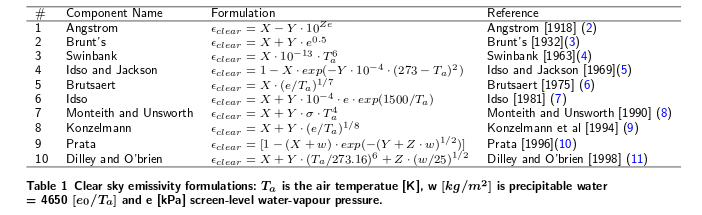

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image

os.chdir(projFolder)
Image("Images/lwrb1.png")

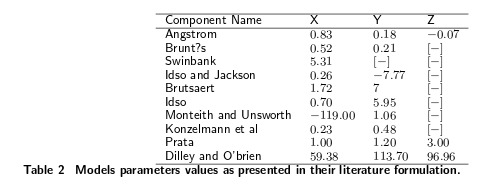

In [16]:
Image("Images/lwrb2.png")

The formulation of the $L_{\uparrow}$ requires the soil emissivity, which usually is a property of the nature of surface, and the surface soil temperature. Table 3 shows the literature values of the soil emissivity for different types of surface: $\epsilon_{s}$ varies from its minimum of 0.95 for the bare soils up to its maximum of 0.99 for the fresh snow

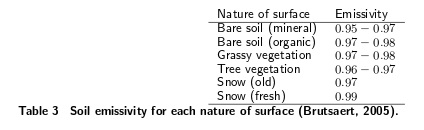

In [17]:
Image("Images/lwrb3.png")

### **Detailed Inputs description**
#### **General description**
The input file is a .csv file containing a header and one or more time series of input data, depending on the number of stations involved. Each column of the file is associated to a different station. The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- The fourth and fifth rows contain the IDs of the stations (e.g. station number 8: value 8, ID, ,8);
- The sixth row contains the information about the type of the input data (in this case, one column with the date and one column with double values);
- The seventh row specifies the date format (YYYY-MM-dd HH:mm).
#### **Clearness index**
The clearness index is the ratio between the measured incoming solar radiation (Im) and the theoretical solar radiation computed at the top atmosphere (I top). This quantity is given in <span style='color:red'>**time series**</span> or <span style='color:red'>**raster maps**</span> of adimensional values between 0 and 1.
#### **Relative humidity**
The relative humidity is given in <span style='color:red'>**time series**</span> or <span style='color:red'>**raster maps**</span> of (%) values. All the conversions are made by the component.
#### **Air temperature**
The air temperature is given in <span style='color:red'>**time series**</span> or <span style='color:red'>**raster maps**</span> of (°C) values. The conversion in Kevin degrees is directly done by the component
#### **Soil temperature**
The soil temperature is given in <span style='color:red'>**time series**</span> or <span style='color:red'>**raster maps**</span> of (°C) values.The conversion in (K) is directly done by the component.
#### **Skyview factor**
The sky view factor is a <span style='color:red'>**raster map**</span> of adimensional values in the interval [0,1] at the given point.
#### **Model**
The model is a String <span style='color:red'>**parameter**</span> containing the number of the model chosen according to table 2.
#### **X, Y, Z** 
X,Y, and Z are the double values <span style='color:red'>**parameters**</span> of the model parameters chosen according to table 2

### **Detailed Outputs description**
The output file will have exactly the same heading of the input file.
#### **$L_{\downarrow}$**
The $L_{\downarrow}$ output is given as a time series at a given point or as raster maps. Its units are $W/m^{2}$. 
#### **$L_{\uparrow}$**
The $L_{\uparrow}$ output is given as a time series at a given point or as raster maps. Its units are $W/m^{2}$. 

**Run longwave simulation**

In [23]:
# %load simulation/Radiation/LongWave.sim
import static oms3.SimBuilder.instance as OMS3
def home = oms_prj

// start and end date of the simulation
def startDate	=	"2006-07-01 00:00"
def endDate		=	"2006-07-31 23:30"
OMS3.sim {
	resource "$oms_prj/lib"
	model(while: "reader_data_airT.doProcess" ) {
		components {    
			// components: reader data input, lwrb and writer data output 
			"reader_data_airT"						"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"reader_data_RH"						"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"reader_data_CI"						"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"reader_sky"							"org.jgrasstools.gears.io.rasterreader.OmsRasterReader"
			"vreader_station"						"org.jgrasstools.gears.io.shapefile.OmsShapefileFeatureReader"
			"lwrb"									"lwrbPointCase.Lwrb"
			"writer_down"                			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter" 
			"writer_up"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"                         
			}  
			parameter{   
				// parameters reader data input air temperature
				"reader_data_airT.file"             "${home}/data/Temp.csv"
				"reader_data_airT.idfield"			"ID"  
				"reader_data_airT.tStart"			"${startDate}"
				"reader_data_airT.tEnd"				"${endDate}"
				"reader_data_airT.tTimestep"		30
				"reader_data_airT.fileNovalue"		"-9999"        
				
				// parameters reader data input relative humidity
			/*	"reader_data_RH.file"				"${home}/data/RH.csv"
				"reader_data_RH.idfield"			"ID"  
				"reader_data_RH.tStart"				"${startDate}"
				"reader_data_RH.tEnd"				"${endDate}"
				"reader_data_RH.tTimestep"		30
				"reader_data_RH.fileNovalue"		"-9999"        	*/			        				                
				
				// parameters reader data input clearness index
				//"reader_data_CI.file"				"${home}/output/Radiation/Clearness_Index.csv" 
				//"reader_data_CI.idfield"			"ID"  
				//"reader_data_CI.tStart"			"${startDate}"
				//"reader_data_CI.tEnd"				"${endDate}"
				//"reader_data_CI.tTimestep"		30
				//"reader_data_CI.fileNovalue"		"-9999"				                
				
				"reader_sky.file"					"${home}/output/Radiation/skyview.asc"
				"vreader_station.file"				"${home}/data/stations.shp"               
				// name of the column in the shape file containing the ID of the station
				"lwrb.fStationsid"					"ID" 
				// parameters of the lwrb  component
				"lwrb.X"							1.72 //0.7						
				"lwrb.Y"               				7 //5.95
				"lwrb.model"           				"5" //"6"
				"lwrb.epsilonS"        				0.98
				"lwrb.A_Cloud"         				0
				"lwrb.B_Cloud"         				1
				// writer output paramters     
				"writer_down.file"					"${home}/output/Radiation/LongwaveDownwelling_Model5.csv" 
				"writer_down.tStart"				"${startDate}"
				"writer_down.fileNovalue"			"-9999"
				"writer_down.tTimestep"				30				        
				
				"writer_up.file"					"${home}/output/Radiation/LongwaveUpwelling_Model5.csv" 
				"writer_up.tStart"					"${startDate}"
				"writer_up.fileNovalue"				"-9999"
				"writer_up.tTimestep"				30        
				}
				connect {        
					"reader_data_airT.outData"		"lwrb.inAirTemperatureValues"
					"reader_data_airT.outData"		"lwrb.inSoilTempratureValues"
					//"reader_data_RH.outData"		"lwrb.inHumidityValues"
					"reader_data_CI.outData"		"lwrb.inClearnessIndexValues"
					"reader_sky.outRaster"			"lwrb.inSkyview"          
					"vreader_station.geodata"		"lwrb.inStations"
					"lwrb.outHMlongwaveDownwelling"	"writer_down.inData"
					"lwrb.outHMlongwaveUpwelling"	"writer_up.inData"
					}
			}
	}



SyntaxError: invalid syntax (<ipython-input-23-3a48fc3383d5>, line 2)

In [24]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Radiation/LongWave.sim

build/ folder exists: project already built.
Reading coverage: skyviewRaster.asc
Reading features from shapefile: Stations.shp
Finished.
Finished.

*********************************
***     END OF SIMULATION     ***
*********************************



Read the shortwave radiation results

In [29]:
nameLw6File = 'output/Radiation/LongwaveUpwelling_Model5.csv'

In [30]:
dfLw5 = pd.read_csv(nameLw6File,
                 skiprows=6, sep=',', parse_dates=[0], 
                 na_values=-9999,usecols=[1,2])
dfLw5.columns = ['Datetime','LW']
dfLw5.index = dfLw5['Datetime']
dfLw5 = dfLw5.iloc[:,1:]
dfLw5.head(3)

,LW
Datetime,
2006-07-01 00:00:00,380.183470
2006-07-01 00:30:00,379.127039
2006-07-01 01:00:00,374.923315


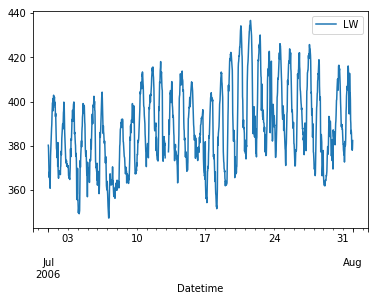

In [32]:
dfLw5.plot()